# Анализ цен на ноутбуки

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Загрузка данных
data = pd.read_csv('laptopPrice.csv')

# Просмотр первых строк данных
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Описание
- brand	- Бренд ноутбука (например, ASUS, Lenovo, HP и т.д.).
- processor_brand - Производитель процессора (например, Intel, AMD).
- processor_name - Название процессора (например, Core i3, Ryzen 5).
- processor_gnrtn - Поколение процессора (например, 10th, 11th).
- ram_gb - Объем оперативной памяти в гигабайтах (например, 4 GB, 8 GB).
- ram_typ - Тип оперативной памяти (например, DDR4, LPDDR4).
- ssd - Объем SSD-накопителя в гигабайтах (например, 256 GB, 512 GB).
- hdd - Объем HDD-накопителя в гигабайтах (например, 1024 GB).
- os - Операционная система (например, Windows, DOS, Mac).
- os_bit - Разрядность операционной системы (например, 32-bit, 64-bit).
- graphic_card_gb - Объем видеопамяти в гигабайтах (например, 2 GB, 4 GB).
- weight - Вес ноутбука (например, Casual, ThinNlight).
- warranty - Гарантия на ноутбук (например, 1 year, No warranty).
- Touchscreen - Наличие сенсорного экрана (Yes/No).
- msoffice - Наличие предустановленного Microsoft Office (Yes/No).
- Price - Цена ноутбука в индийских рупиях (целевая переменная).
- rating - Рейтинг ноутбука (например, 3 stars, 4 stars).
- Number of Ratings - Количество оценок ноутбука.
- Number of Reviews - Количество отзывов о ноутбуке.

In [2]:
# Проверка пустых значений
null_counts = data.isnull().sum()
print(null_counts)

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


### Вывод: пустые значения не найдены

## Визуальный анализ

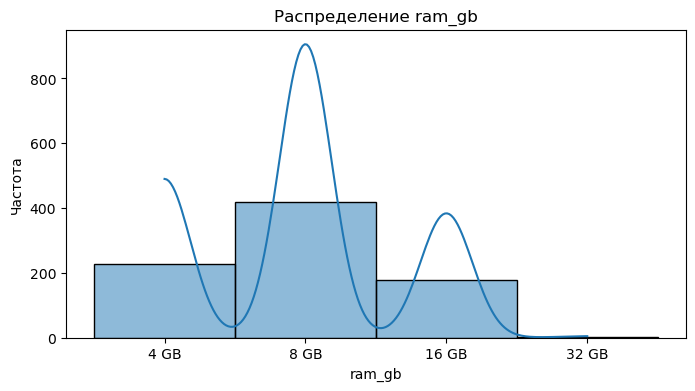

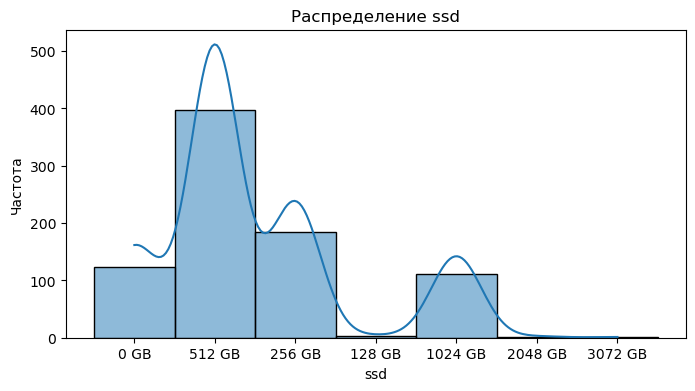

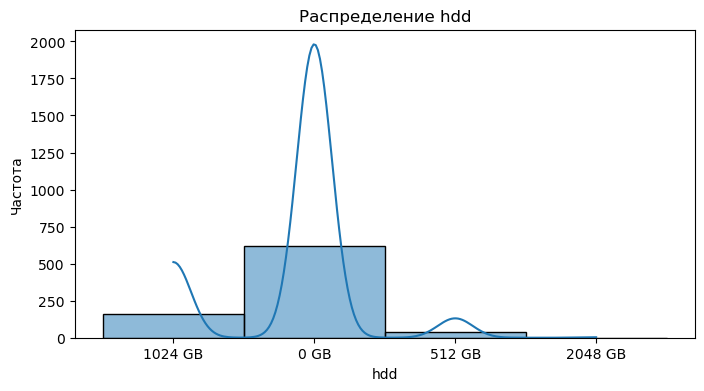

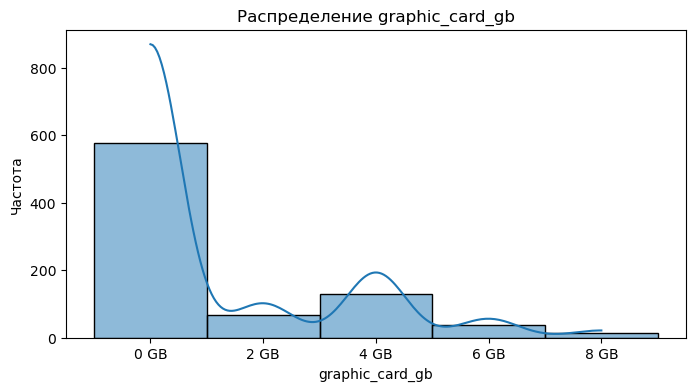

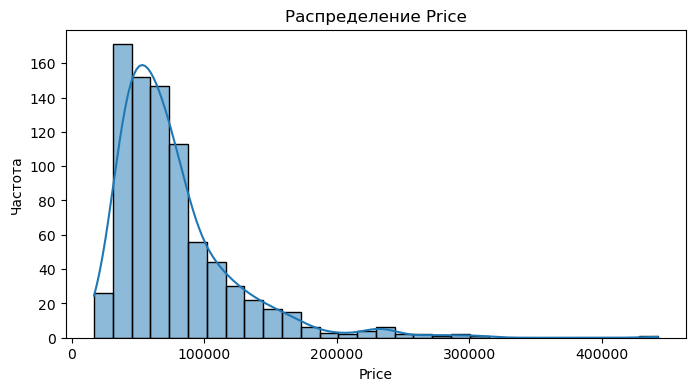

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графический анализ для числовых атрибутов
numerical_columns = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'Price']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

### Для атрибута Price (цена) будет видно правостороннее распределение (перекос вправо), что типично для данных о ценах.

### Для атрибута ram_gb (объем оперативной памяти) будет видно несколько пиков, соответствующих популярным объемам памяти (например, 4 GB, 8 GB, 16 GB).

In [4]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию DataFrame, чтобы не изменять исходные данные
data_encoded = data.copy()

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Проходим по всем столбцам
for column in data_encoded.columns:
    # Если столбец является объектом (строковым), кодируем его
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])
    # Если столбец уже числовой, преобразуем его в int
    else:
        data_encoded[column] = data_encoded[column].astype(int)

# Проверяем результат
data_encoded.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,38999,2,65,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,26990,2,0,0


In [5]:
data_encoded.describe()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,3.221142,0.799514,3.530984,2.667072,2.075334,1.415553,3.951397,0.346294,1.927096,0.867558,0.595383,0.688943,1.072904,0.117861,0.341434,76745.177400,2.562576,315.301337,37.609964
std,1.972978,0.467847,2.898729,2.899530,1.169008,1.156743,2.362536,0.726879,0.326498,0.339177,1.013451,0.925687,1.408017,0.322640,0.474479,45101.790525,0.567282,1047.382654,121.728017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46095.000000,2.000000,0.000000,0.000000
50%,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,4.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64990.000000,3.000000,17.000000,2.000000
75%,5.000000,1.000000,5.000000,7.000000,3.000000,1.000000,6.000000,0.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000,89636.000000,3.000000,139.500000,18.000000
max,7.000000,2.000000,10.000000,7.000000,3.000000,5.000000,6.000000,3.000000,2.000000,1.000000,4.000000,2.000000,3.000000,1.000000,1.000000,441990.000000,4.000000,15279.000000,1947.000000


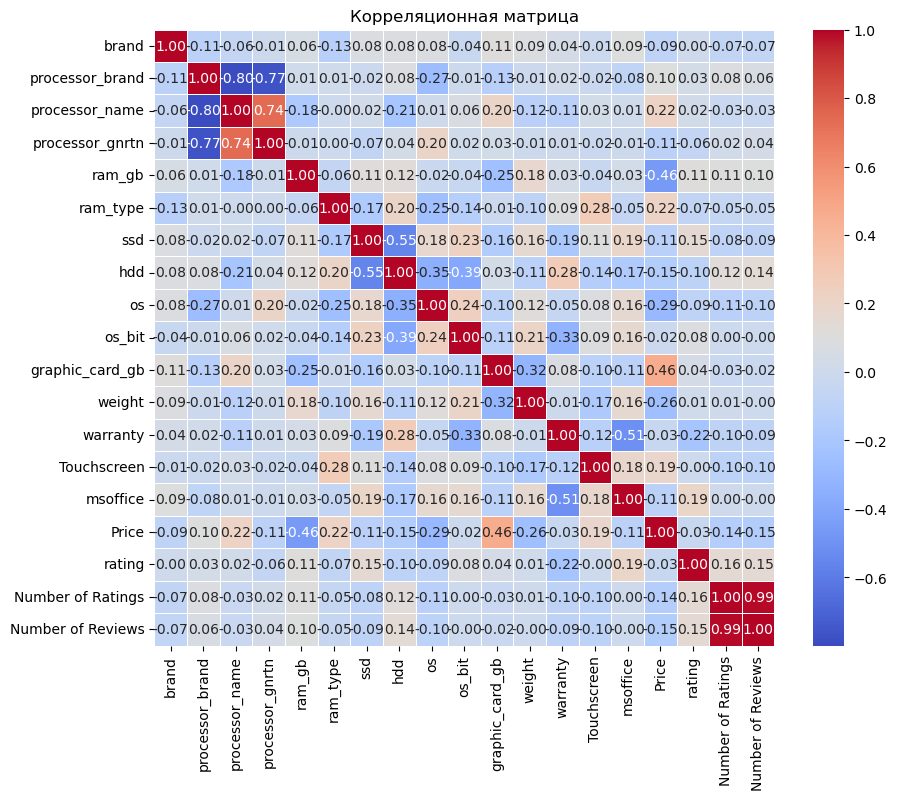

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу
correlation_matrix = data_encoded.corr()

# Визуализируем корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

# Сравнение моделей регрессии

### Мы будудем сравнивать модели регрессий на нашем dataframe такие как: LinearRegression, DecisionTreeRegressor, RandomForestRegressor.

### Импорт библиотек

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Подготовка данных

In [8]:
X = data_encoded.drop('Price', axis=1)  # Признаки
y = data_encoded['Price']  # Целевая переменная

In [9]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Text(0.5, 1.0, 'Линейная регрессия')

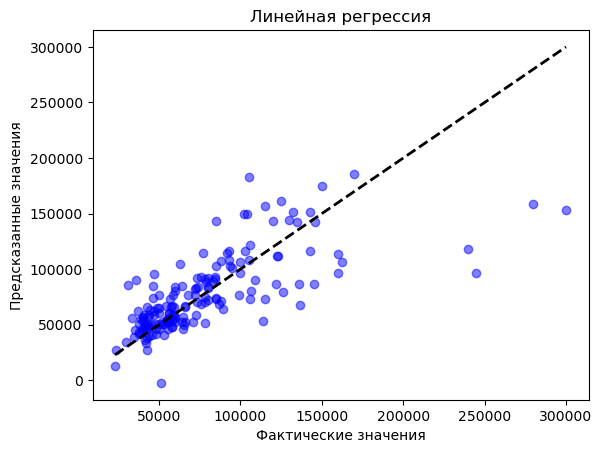

In [11]:
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

# Вычисление R^2 и MSE для линейной регрессии
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f'R^2 для линейной регрессии: {r2_lr:.2f}')
print(f'MSE для линейной регрессии: {mse_lr:.2f}')

R^2 для линейной регрессии: 0.54
MSE для линейной регрессии: 354713850.12


### Регрессия на основе дерева решений

In [12]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Text(0.5, 1.0, 'Дерево решений')

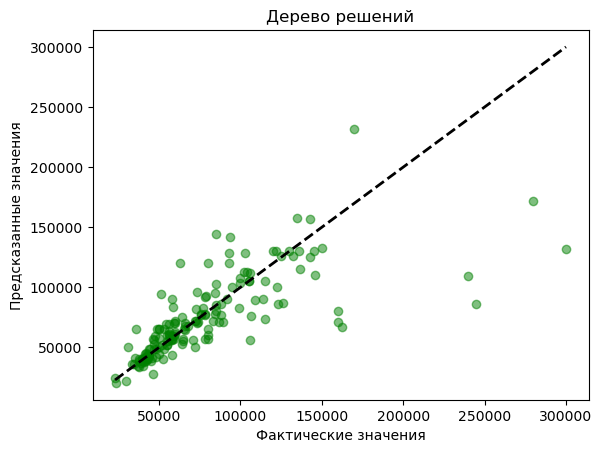

In [13]:
# График для дерева решений
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений')

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

# Вычисление R^2 и MSE
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f'R^2 для дерева решений: {r2_dt:.2f}')
print(f'MSE для дерева решений: {mse_dt:.2f}')

R^2 для дерева решений: 0.68
MSE для дерева решений: 249665312.25


### Случайный лес

In [28]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Случайный лес')

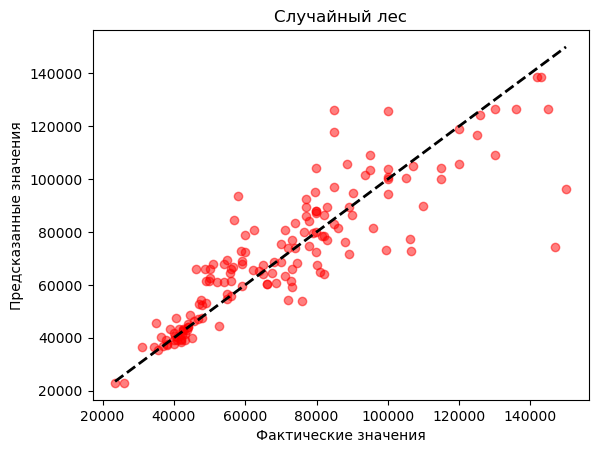

In [29]:
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

# Вычисление R^2 и MSE для случайного леса
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'R^2 для случайного леса: {r2_rf:.2f}')
print(f'MSE для случайного леса: {mse_rf:.2f}')

R^2 для случайного леса: 0.76
MSE для случайного леса: 181526716.13


### Сравнение моделей по MSE

In [16]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'MSE Линейной регрессии: {mse_lr:.2f}')
print(f'MSE Дерева решений: {mse_dt:.2f}')
print(f'MSE Случайного леса: {mse_rf:.2f}')

MSE Линейной регрессии: 963314724.26
MSE Дерева решений: 908779349.78
MSE Случайного леса: 697802117.38


### Проверка значений

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Базовые предсказания (среднее значение)
y_pred_baseline_mean = np.full_like(y_test, y_train.mean())
mse_baseline_mean = mean_squared_error(y_test, y_pred_baseline_mean)

# Базовые предсказания (медиана)
y_pred_baseline_median = np.full_like(y_test, y_train.median())
mse_baseline_median = mean_squared_error(y_test, y_pred_baseline_median)

print(f'MSE (среднее значение): {mse_baseline_mean:.2f}')
print(f'MSE (медиана): {mse_baseline_median:.2f}')

MSE (среднее значение): 414166563.82
MSE (медиана): 311659733.16


### Вывод: значени MSE каждой модели примерно в три раза превышает значения MSE среднего значения и медианы

### Так как выше на графиках отчетливо видно, что имеется очень много выбросов, их следует удалить, для лучшей работы моделей

In [18]:
# Вычисление IQR для целевой переменной (Price)
Q1 = data_encoded['Price'].quantile(0.25)
Q3 = data_encoded['Price'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
data_cleaned = data_encoded[(data_encoded['Price'] >= lower_bound) & (data_encoded['Price'] <= upper_bound)]
print(f'Размер данных до удаления выбросов: {len(data_encoded)}')
print(f'Размер данных после удаления выбросов: {len(data_cleaned)}')

Размер данных до удаления выбросов: 823
Размер данных после удаления выбросов: 773


### В итоге из 823 данных удалено 50 выбросов

In [19]:
# Подготовка данных
X = data_cleaned.drop('Price', axis=1)  # Признаки
y = data_cleaned['Price']  # Целевая переменная

In [20]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 1. Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Text(0.5, 1.0, 'Линейная регрессия')

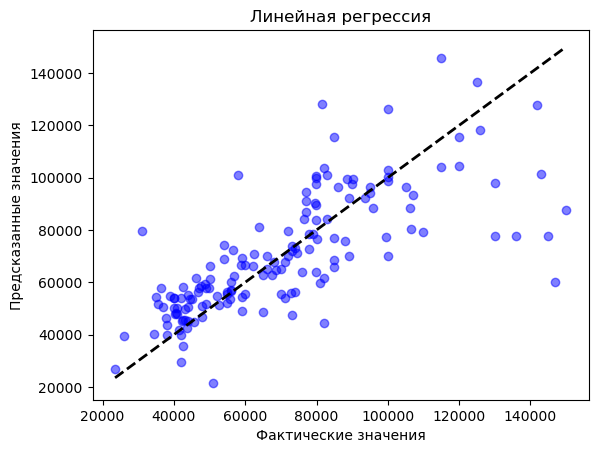

In [22]:
# График для линейной регрессии
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')

In [23]:
# 2. Регрессия на основе дерева решений
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Text(0.5, 1.0, 'Дерево решений')

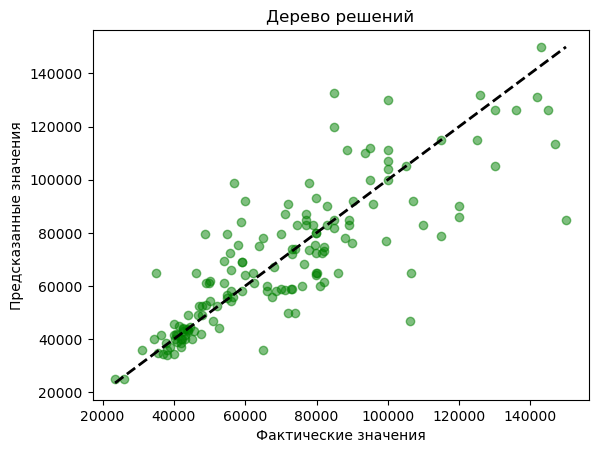

In [24]:
# График для дерева решений
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Дерево решений')

In [25]:
# 3. Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Случайный лес')

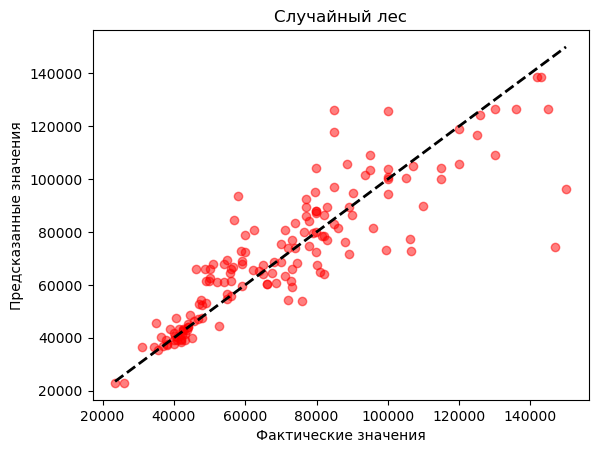

In [26]:
# График для случайного леса
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

# Вычисление R^2 и MSE для линейной регрессии
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Вычисление R^2 и MSE для дерева решений
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Вычисление R^2 и MSE для случайного леса
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Вывод результатов
print(f'Линейная регрессия: R^2 = {r2_lr:.2f}, MSE = {mse_lr:.2f}')
print(f'Дерево решений: R^2 = {r2_dt:.2f}, MSE = {mse_dt:.2f}')
print(f'Случайный лес: R^2 = {r2_rf:.2f}, MSE = {mse_rf:.2f}')

Линейная регрессия: R^2 = 0.54, MSE = 354713850.12
Дерево решений: R^2 = 0.68, MSE = 249665312.25
Случайный лес: R^2 = 0.76, MSE = 181526716.13


### В итоге видно, что после удаления выбросов MSE стола в 3 раза меньше и самая лучшая модель из проверенных это Случайный лес.